<a href="https://colab.research.google.com/github/sachin2000k/CodeDown-Projects/blob/master/CNN5_(Fashion_MNIST).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Classifying Fashion MNIST with tf.keras estimator model

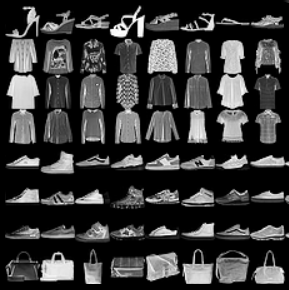

In [0]:
import os
import time
import tensorflow as tf
import numpy as np

In [3]:
LABEL_DIMENSIONS = 10
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
TRAINING_SIZE = len(x_train)
TEST_SIZE = len(x_test)

4423680/4422102 [==============================] - 0s 0us/step


In [4]:
TRAINING_SIZE, TEST_SIZE

(60000, 10000)

In [0]:
x_train = np.asarray(x_train, dtype = np.float32) / 255
x_train = x_train.reshape((TRAINING_SIZE, 28,28,1))
x_test = np.asarray(x_test, dtype = np.float32) / 255
x_test = x_test.reshape((TEST_SIZE, 28,28,1))
y_train = tf.keras.utils.to_categorical(y_train, LABEL_DIMENSIONS)
y_test = tf.keras.utils.to_categorical(y_test, LABEL_DIMENSIONS)

In [6]:
x_test.shape

(10000, 28, 28, 1)

In [7]:
y_train.shape

(60000, 10)

In [8]:
inputs = tf.keras.Input(shape = (28,28,1))
x = tf.keras.layers.Conv2D(filters = 32, kernel_size=(3,3), activation = 'relu')(inputs)
x = tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=2)(x)
x = tf.keras.layers.Conv2D(filters = 64, kernel_size=(3,3))(x)
x = tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = 2)(x)
x = tf.keras.layers.Conv2D(filters = 64, kernel_size=(3,3), activation = 'relu')(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
predictions = tf.keras.layers.Dense(LABEL_DIMENSIONS, activation='softmax')(x)
model = tf.keras.Model(inputs=inputs, outputs = predictions)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0     

In [0]:
# another approach for creating model
from tensorflow.keras import models, layers

In [0]:
def load_model():
  model = models.Sequential()
  model.add(layers.Conv2D(input_shape = (28,28,1)))

In [0]:
optimizer = tf.keras.optimizers.SGD()
model.compile(loss = 'categorical_crossentropy', optimizer = optimizer,
              metrics = ['accuracy'])

In [0]:
strategy = None #running on CPU
#strategy = tf.distribute.MirroredStrategy()
config = tf.estimator.RunConfig(train_distribute=strategy)

In [27]:
estimator = tf.keras.estimator.model_to_estimator(model, config=config)

INFO:tensorflow:Using the Keras model provided.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpcn36ocfl', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [0]:
def input_fn(images, labels, epochs, batch_size):
  dataset = tf.data.Dataset.from_tensor_slices((images, labels))
  SHUFFLE_SIZE = 5000
  dataset = dataset.shuffle(SHUFFLE_SIZE).repeat(epochs).batch(batch_size)
  dataset = dataset.prefetch(None)
  return dataset

In [29]:
BATCH_SIZE = 512
EPOCHS = 50
estimator_train_result = estimator.train(input_fn=lambda:input_fn(x_train, y_train,
                                                                  epochs = EPOCHS,
                                                                  batch_size = BATCH_SIZE))
print(estimator_train_result)

Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Warm-starting with WarmStartSettings: WarmStartSettings(ckpt_to_initialize_from='/tmp/tmpcn36ocfl/keras/keras_model.ckpt', vars_to_warm_start='.*', var_name_to_vocab_info={}, var_name_to_prev_var_name={})
INFO:tensorflow:Warm-starting from: /tmp/tmpcn36ocfl/keras/keras_model.ckpt
INFO:tensorflow:Warm-starting variables only in TRAINABLE_VARIABLES.
INFO:tensorflow:Warm-started 10 variables.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmpcn36ocfl/model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after sa

In [30]:
estimator.evaluate(lambda: input_fn(x_test,
                                    y_test,
                                    epochs = 1,
                                    batch_size = BATCH_SIZE))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-04-18T06:58:50Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpcn36ocfl/model.ckpt-5860
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 2.09466s
INFO:tensorflow:Finished evaluation at 2020-04-18-06:58:53
INFO:tensorflow:Saving dict for global step 5860: accuracy = 0.8245, global_step = 5860, loss = 0.47560978
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 5860: /tmp/tmpcn36ocfl/model.ckpt-5860


{'accuracy': 0.8245, 'global_step': 5860, 'loss': 0.47560978}

running on GPU

In [11]:
strategy = tf.distribute.MirroredStrategy()
config = tf.estimator.RunConfig(train_distribute=strategy)

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
INFO:tensorflow:Initializing RunConfig with distribution strategies.
INFO:tensorflow:Not using Distribute Coordinator.


In [13]:
estimator = tf.keras.estimator.model_to_estimator(model, config=config)

INFO:tensorflow:Using the Keras model provided.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmppk135ylx', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': <tensorflow.python.distribute.mirrored_strategy.MirroredStrategy object at 0x7fbc500ad7f0>, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chie

In [16]:
BATCH_SIZE = 512
EPOCHS = 50
estimator_train_result = estimator.train(input_fn=lambda:input_fn(x_train, y_train,
                                                                  epochs = EPOCHS,
                                                                  batch_size = BATCH_SIZE))
print(estimator_train_result)

INFO:tensorflow:Reduce to /replica:0/task:0/device:CPU:0 then broadcast to ('/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Reduce to /replica:0/task:0/device:CPU:0 then broadcast to ('/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /replica:0/task:0/device:CPU:0 then broadcast to ('/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /replica:0/task:0/device:CPU:0 then broadcast to ('/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /replica:0/task:0/device:CPU:0 then broadcast to ('/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /replica:0/task:0/device:CPU:0 then broadcast to ('/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /replica:0/task:0/device:CPU:0 then broadcast to ('/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /replica:0/task:0/device:CPU:0 then broadcast to ('/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /replica:0/task:0/device:CPU:0 then broadcas

In [17]:
estimator.evaluate(lambda: input_fn(x_test,
                                    y_test,
                                    epochs = 1,
                                    batch_size = BATCH_SIZE))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-04-18T07:39:14Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmppk135ylx/model.ckpt-5860
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.48464s
INFO:tensorflow:Finished evaluation at 2020-04-18-07:39:14
INFO:tensorflow:Saving dict for global step 5860: accuracy = 0.8361, global_step = 5860, loss = 0.45343167
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 5860: /tmp/tmppk135ylx/model.ckpt-5860


{'accuracy': 0.8361, 'global_step': 5860, 'loss': 0.45343167}